# Fraud  Loan Prediction 

To Find Whether to give loan to a person or not based on the information. Train the model.

In [146]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [147]:
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [148]:
#Let's drop Loan_ID as it is not significant to the results
df.drop('Loan_ID',axis=1,inplace=True)

In [149]:
#Finding out shape
df.shape

(614, 12)

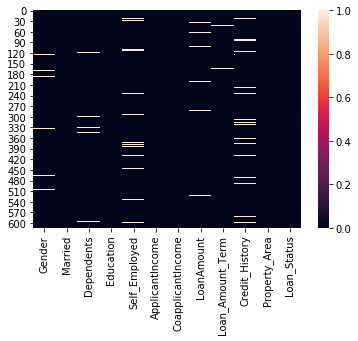

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [150]:
# Checking for null values
sns.heatmap(df.isnull())
plt.show()
# Counts of nulls
df.isnull().sum()

In [151]:
# Before impputing Values for Null, Let's understand the data
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [152]:
df.describe(include='all')
# Looks like the first 5 and last 2 are categorical values and remaining continous. But Loan Amount Term and Credit History seems to be Categorical Values too. Let's check

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [153]:
df.Loan_Amount_Term.value_counts()
# All appear to be multiples of 12, possibly there are in months. Let's convert to years instead of months.

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [154]:
df['Loan_Amount_Term']=df['Loan_Amount_Term']/12
df.Loan_Amount_Term.value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
7.0       4
20.0      4
10.0      3
3.0       2
5.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

In [155]:
# We can further categories loan term to 10 year spans:

df['Loan_Amount_Term'] = pd.cut(df['Loan_Amount_Term'],bins=[0,10,20,30,40],labels=['0-10','11-20','21-30','31-40'])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('object')
df['Loan_Amount_Term'].value_counts()

21-30    525
11-20     48
31-40     15
0-10      12
Name: Loan_Amount_Term, dtype: int64

In [156]:
df.Credit_History.value_counts()
# As Expected, this feature is also categorical in nature.

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [157]:
df['Credit_History']=df['Credit_History'].astype('object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000687FACF3C8>,
      dtype=object)

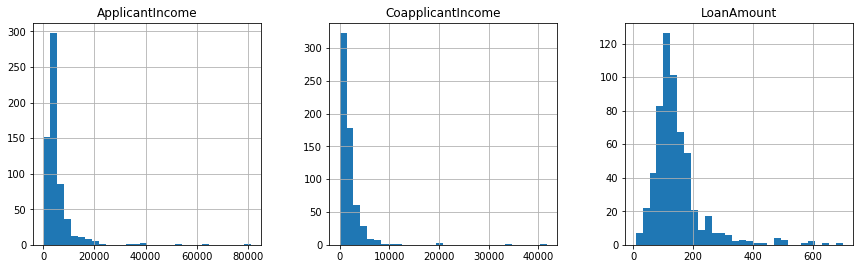

In [158]:
# Let's create seprate lists for categorical and continous features:
cat=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
cont=['ApplicantIncome','CoapplicantIncome','LoanAmount']

# Plotting distibution graphs for continous values
df[cont].hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

# Only LoanAmount seems normally distributed. We'll treat skewness later

In [159]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [160]:
# We're now ready to impute null values
for col in cat:
    df[col] = df.groupby('Loan_Status')[col].transform(lambda x: x.fillna(x.mode().iloc[0]))
    
for col in cont:
    df[col] = df.groupby('Loan_Status')[col].transform(lambda x: x.fillna(x.mean()))

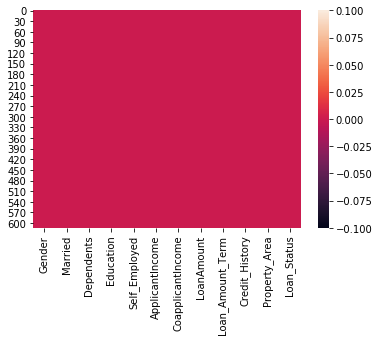

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [161]:
# Once again Checking null Values
sns.heatmap(df.isnull())
plt.show()
# Counts of nulls
df.isnull().sum()

# Null Values Removed Successfully

In [162]:
# Correlation within continous variables
df[cont].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.565614
CoapplicantIncome,-0.116605,1.000000,0.187669
LoanAmount,0.565614,0.187669,1.000000


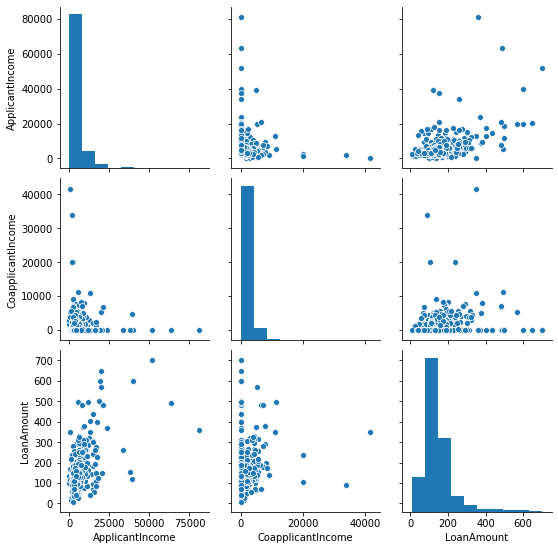

In [163]:
# Pairplots within continous variables
sns.pairplot(df[cont])

# Slight correlation is there between Income and Loan Amount

In [164]:
# Let's see how the various categorical variables are behaving with respect to target - Loan_Status
cat.remove('Loan_Status')

Plotting  Gender  with respect to Loan_Status
 Figure.  Gender


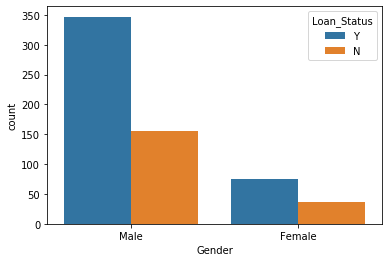

Plotting  Married  with respect to Loan_Status
 Figure.  Married


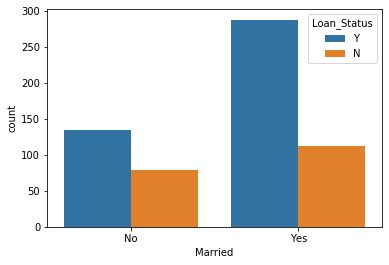

Plotting  Dependents  with respect to Loan_Status
 Figure.  Dependents


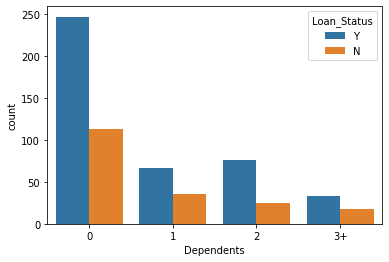

Plotting  Education  with respect to Loan_Status
 Figure.  Education


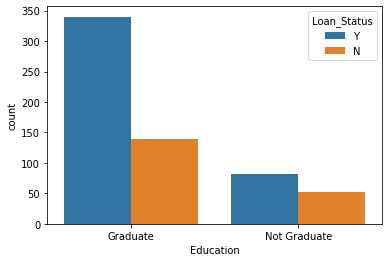

Plotting  Self_Employed  with respect to Loan_Status
 Figure.  Self_Employed


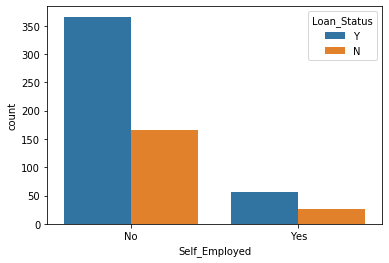

Plotting  Loan_Amount_Term  with respect to Loan_Status
 Figure.  Loan_Amount_Term


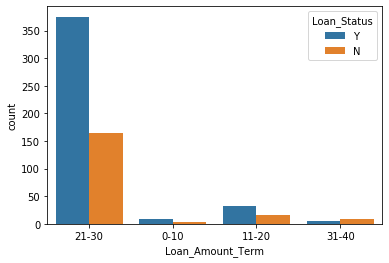

Plotting  Credit_History  with respect to Loan_Status
 Figure.  Credit_History


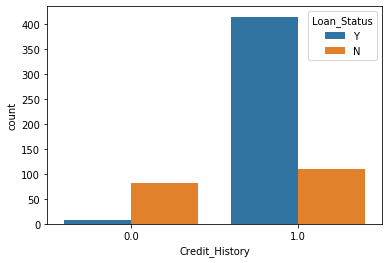

Plotting  Property_Area  with respect to Loan_Status
 Figure.  Property_Area


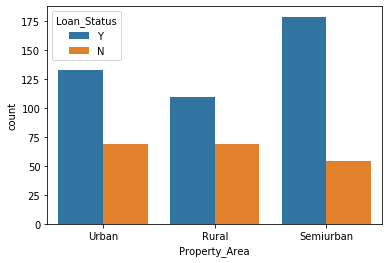

In [165]:
for i in cat:
    print("Plotting ",i," with respect to Loan_Status\n","Figure. ",i)
    sns.countplot(i,data=df,hue='Loan_Status')
    plt.show()

# Observations from above graphs:

1. Data has more males. In both males and females higher portion have recieved Load Aprovals. But in males ratio of Yes is higher

2. Married people hve higher chances of loan Approval. The graph shows a higher proportion

3. More chances of Loan Approval if lesser dependants are there. As we can see - 0 dependents have got higher loans

4. Graduate people have higher chances of getting Loan.

5. Self-Employed people have lesser chances of Loan Approval.

6. 21-30 year term has maximum chances of Approval. 10-20 also have good ratio. 0-10 have few number but for >30, high chances are that loan will not be approved

7. Those with Credit_History=1 have very high chances. 0 Credit history have poor chances.

8. Peple in Semi urban area have maximum chances of approval followed by urban areas. In rural area, chances are pretty less.

In [166]:
# Checking for skewness in continous variables
df[cont].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.724592
dtype: float64

In [167]:
# Treating for skewness
for col in df.columns:
    if df[col].dtypes!="object":
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.square(df[col])
df.skew()
# All 3 continous values have been treated successfully

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.181343
Credit_History      -2.021971
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006804DBF408>,
      dtype=object)

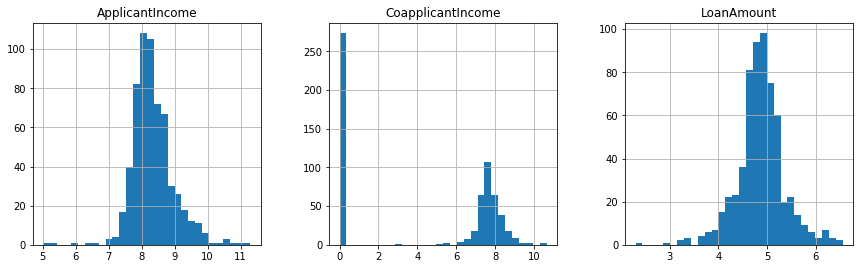

In [168]:
df[cont].hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)
# Now all seem to be Normally distributed

In [169]:
# Let's do Label Encoding on the Categorical Values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes=="object":
        df[col]=le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.978762,2,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,2,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,2,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,2,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,2,1.0,2,1


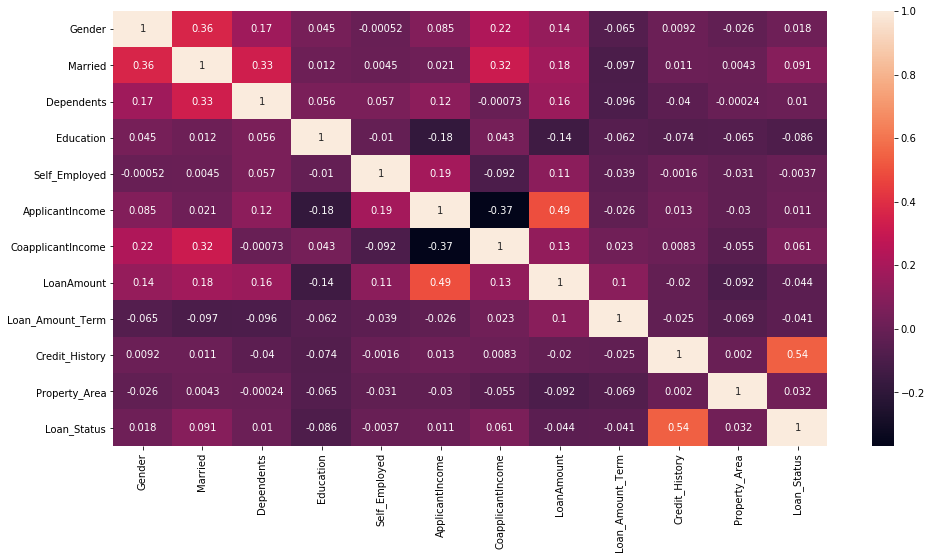

In [170]:
# Let's see correlation between all variables
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
# Not much Correlation

In [171]:
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)
# Let's treat the outliers if any

(614, 12)
(587, 12)


In [172]:
# Let's Separate our dataset into Features and target
x=df.drop(columns=["Loan_Status"])
y=df[["Loan_Status"]]

In [173]:
# Let's do Standard Scaling on the Continous variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x[cont]=sc.fit_transform(x[cont])
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.637689,-1.119790,0.253363,2,1.0,2
1,1,1,1,0,0,0.194895,0.774696,-0.018037,2,1.0,0
2,1,1,0,0,1,-0.574284,-1.119790,-1.512780,2,1.0,2
3,1,1,0,1,0,-0.845925,0.890342,-0.164111,2,1.0,2
4,1,0,0,0,0,0.683961,-1.119790,0.201033,2,1.0,2


# Modelling

In [174]:
# For Classification let's focus on auc-roc score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [175]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="roc_auc")
    print("Mean ROC_AUC score for classifier: ",c_scores.mean())
    print("standard deviation in ROC_AUC score for classifier: ",c_scores.std())
    print(c_scores)

In [176]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 250}

In [177]:
rfc=RandomForestClassifier(n_estimators=250)
r_state=max_aucroc_score(rfc,x,y)

max auc roc score corresponding to  76  is  0.8069736403069736


In [178]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knn, parameters, cv=5,scoring="roc_auc")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 18}

In [179]:
knn=KNeighborsClassifier(n_neighbors=18)
r_state=max_aucroc_score(knn,x,y)

max auc roc score corresponding to  57  is  0.6081081081081081


In [180]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
parameters = {"criterion":["gini", "entropy"]}
clf = GridSearchCV(dc, parameters, cv=5,scoring="roc_auc")
clf.fit(x, y)
clf.best_params_

{'criterion': 'gini'}

In [181]:
dc=DecisionTreeClassifier(criterion="gini")
r_state=max_aucroc_score(dc,x,y)

max auc roc score corresponding to  53  is  0.7452452452452453


In [182]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [191]:
svc=SVC(kernel="rbf",C=1,probability=True)
r_state=max_aucroc_score(svc,x,y)

max auc roc score corresponding to  51  is  0.804637971304638


In [184]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=max_aucroc_score(lg,x,y)

max auc roc score corresponding to  76  is  0.8243243243243243


In [185]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
r_state=max_aucroc_score(gnb,x,y)

max auc roc score corresponding to  76  is  0.8181514848181515


In [186]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
r_state=max_aucroc_score(gb,x,y)

max auc roc score corresponding to  76  is  0.7934601267934602


In [187]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
r_state=max_aucroc_score(ad,x,y)

max auc roc score corresponding to  42  is  0.766433099766433


In [193]:
# Cross Validation

print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nSVM Classifier\n\n")
model_evaluation(svc,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)

print("\n\nGaussian NB Classifier\n\n")
model_evaluation(gnb,x,y)

print("\n\nGradient Boost\n\n")
model_evaluation(gb,x,y)

print("\n\nAdaboost Classifier\n\n")
model_evaluation(ad,x,y)



Random Forest Classifier


Mean ROC_AUC score for classifier:  0.7892112482853223
standard deviation in ROC_AUC score for classifier:  0.04396890263385517
[0.79496163 0.72155489 0.7760631  0.85888203 0.79459459]


KNN Classifier


Mean ROC_AUC score for classifier:  0.7375983390798205
standard deviation in ROC_AUC score for classifier:  0.04910662527438897
[0.78945612 0.7335669  0.76766118 0.75068587 0.64662162]


SVM Classifier


Mean ROC_AUC score for classifier:  0.7755159789419047
standard deviation in ROC_AUC score for classifier:  0.03992133516888165
[0.74774775 0.75809142 0.83264746 0.8117284  0.72736486]


DecisionTree Classifier


Mean ROC_AUC score for classifier:  0.6860201868535201
standard deviation in ROC_AUC score for classifier:  0.05427371854438357
[0.65799132 0.60126793 0.6882716  0.75925926 0.72331081]


Logistic Regression Classifier


Mean ROC_AUC score for classifier:  0.7518346123901679
standard deviation in ROC_AUC score for classifier:  0.02818906078063241
[0

# Selecting Random Forest with Mean ROC_AUC score 0.777 and StdDev 0.03

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 76,test_size=0.20)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

Confusion matrix 
 [[17 23]
 [ 1 77]]
classification report 
               precision    recall  f1-score   support

           0       0.94      0.42      0.59        40
           1       0.77      0.99      0.87        78

    accuracy                           0.80       118
   macro avg       0.86      0.71      0.73       118
weighted avg       0.83      0.80      0.77       118

AUC_Score: 0.7060897435897436
[1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1]


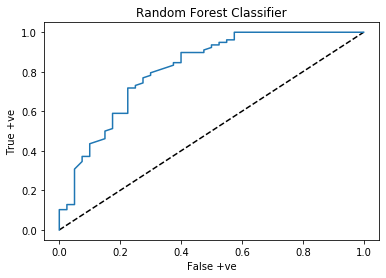

In [198]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('AUC_Score:',roc_auc_score(y_test,y_pred))
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('Random Forest Classifier')
plt.show
print(y_pred)

In [199]:
from sklearn.externals import joblib
joblib.dump(rfc,'Fraud_Loan_Prediction.pkl')

['Fraud_Loan_Prediction.pkl']